In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import pandas
import matplotlib.pyplot as plt
!pip install plfit
import plfit
!pip install pyveplot
import pyveplot
from networkx.algorithms import community
import math
from math import log
import scipy.special as sp
import networkx.algorithms.community as nx_comm
from random import sample

In [ ]:
df = pd.read_csv('large_twitch_edges.csv', header=None, names=['a','b'])
#df
df = df.iloc[1: , :]
df


# use itertools to flatten our list of lists

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,a,b
1,98343,141493
2,98343,58736
3,98343,140703
4,98343,151401
5,98343,157118
...,...,...
6797553,97507,29359
6797554,71175,12020
6797555,151702,128281
6797556,118034,38021


In [ ]:
twitch = nx.from_edgelist(df.values)

In [ ]:
subset = df.sample(n=10000)
twitch2 = nx.from_edgelist(subset.values)
nodes2 = twitch2.number_of_nodes()
print(nodes2)

14931


In [ ]:
subset = df.sample(n=1000)
twitch3 = nx.from_edgelist(subset.values)
nodes3 = twitch3.number_of_nodes()
print(nodes3)

1873


In [ ]:
subset = df.sample(n=1000000)
twitch4 = nx.from_edgelist(subset.values)
nodes4 = twitch4.number_of_nodes()
edges4 = twitch4.number_of_edges()
avg_deg4 = 2*edges4 /nodes4
print(nodes4)
print(avg_deg4)
random_clustering_coef4 = avg_deg4/nodes4
print(random_clustering_coef4)

176640
11.322463768115941
6.409909289014913e-05


In [ ]:
df_degree = pd.DataFrame(twitch2.degree(), columns=["node", "degree"])
df_degree.head()

,node,degree
0,71464,1
1,143142,2
2,29329,2
3,164205,3
4,98465,1


In [ ]:
degree_count = df_degree.groupby('degree')['degree'].count()
degree_dist = pd.DataFrame({'n':degree_count})

degree_dist['p'] = degree_dist['n']/degree_dist['n'].sum()
degree_dist['cdf'] = np.cumsum(degree_dist['p'])
degree_dist['ccdf'] = 1-degree_dist['cdf']
degree_dist


,n,p,cdf,ccdf
degree,,,,
1,12434,0.832764,0.832764,0.167236
2,1655,0.110843,0.943607,0.056393
3,414,0.027728,0.971335,0.028665
4,158,0.010582,0.981917,0.018083
5,83,0.005559,0.987476,0.012524
6,47,0.003148,0.990624,0.009376
7,29,0.001942,0.992566,0.007434
8,26,0.001741,0.994307,0.005693
9,17,0.001139,0.995446,0.004554


In [ ]:
df_degreefull = pd.DataFrame(twitch.degree(), columns=["node", "degree"])
degree_countfull = df_degreefull.groupby('degree')['degree'].count()
degree_distfull = pd.DataFrame({'n':degree_countfull})

degree_distfull['p'] = degree_distfull['n']/degree_distfull['n'].sum()
degree_distfull['cdf'] = np.cumsum(degree_distfull['p'])
degree_distfull['ccdf'] = 1-degree_distfull['cdf']

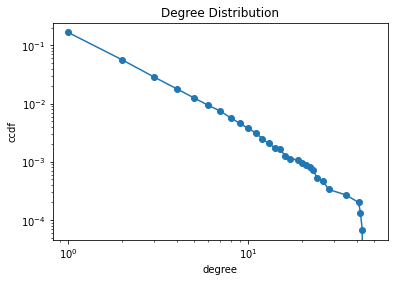

In [ ]:
plt.plot(degree_dist.index, degree_dist['ccdf'])
plt.scatter(degree_dist.index, degree_dist['ccdf'])
plt.xlabel('degree')
plt.ylabel('ccdf')
plt.yscale('log')
plt.xscale('log')
plt.title("Degree Distribution")
plt.show()

In [ ]:
subset = df.sample(n=1000)
twitch3 = nx.from_edgelist(subset.values)
nodes3 = twitch3.number_of_nodes()
edges3 = twitch3.number_of_edges()
print(nodes3)
#print(subset)

1881


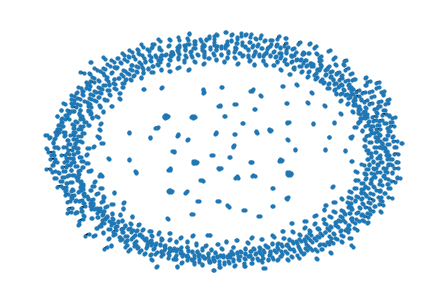

In [ ]:
nx.draw(twitch3, node_size=10, width = 2)
plt.show()

In [ ]:
#A = nx.adjacency_matrix(twitch2)
#dim(A)
A2 = nx.to_numpy_matrix(twitch2)
#print(A)
# this function gets us the matrix to a power
A3 = np.linalg.matrix_power(A2,2)
print(A3)
# check that the diagonal elements equal the node degrees for A^2
#print(ba_net.degree())

[[50.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]]


In [ ]:
def shortest_paths(net,k, i, j):
  A = nx.to_numpy_matrix(net)
  A_k = np.linalg.matrix_power(A,k)
  return(A_k[(i-1),(j-1)])

shortest_paths(net = twitch2, k = 2, i = 2, j = 2)

2.0

In [ ]:
print("The clustering coefficient is " + str(nx.average_clustering(twitch4)))

The clustering coefficient is 0.018506845201888368


In [ ]:
nodes4 = twitch4.number_of_nodes()
edge_count4 = twitch4.number_of_edges()
avg_deg4 = 2*edge_count4 /nodes4
random_clustering_coef4 = avg_deg4/nodes4
print(random_clustering_coef4)

6.399543515134253e-05


In [ ]:
nodes = twitch.number_of_nodes()
print(nodes)

256953


In [ ]:
edge_count = twitch.number_of_edges()

In [ ]:
avg_deg = 2*edge_count /nodes
print(avg_deg)

52.90895222083416


In [ ]:
from numpy.ma.core import exp
#random_deg_dist = exp^{-avg_deg}*(avg_deg^degree_distfull)/factorial(degree_distfull)
print(math.factorial(degree_distfull))

TypeError: ignored

In [ ]:
random_clustering_coef = avg_deg/nodes
print(random_clustering_coef)

0.0002059090659413751


In [ ]:
avg_deg2 = 2*edges2 /nodes2
print(avg_deg2)

1.3335111348179758


In [ ]:
random_clustering_coef2 = avg_deg2/nodes2
print(random_clustering_coef2)

8.891259733417628e-05


In [ ]:
def gen_er_net(N, av_degree):
  p = av_degree/(N-1)
  er_net = nx.erdos_renyi_graph(n= N, p = p)
  return(er_net)

In [ ]:
paths = len(A3)
path_lengths = sum(A3.diagonal)
avg_path_length = path_lengths/paths
#print(avg_path_length)
print(path_lengths)

TypeError: ignored

In [ ]:
er_net = gen_er_net(N = nodes, av_degree= avg_deg)

In [ ]:
er_degrees = [val for (node, val) in er_net.degree()]
sum(er_degrees)/nodes2

1.3357781037471663

In [ ]:
# Getting the degree distribution
degree_dfr = pd.DataFrame(er_degrees, columns = ["degree"]) # create data frame with degree of each node as a column
degree_countr = degree_dfr.groupby('degree')['degree'].count() # get the number of nodes with each degree
degree_distr = pd.DataFrame({'n':degree_countr}) # convert to dataframe
degree_distr['p'] = degree_distr['n']/degree_distr['n'].sum() # add probability that a node chosen at random is that degree
degree_distr['cdf'] = np.cumsum(degree_distr['p'])
degree_distr['ccdf'] = 1-degree_distr['cdf']
#print(degree_dist)

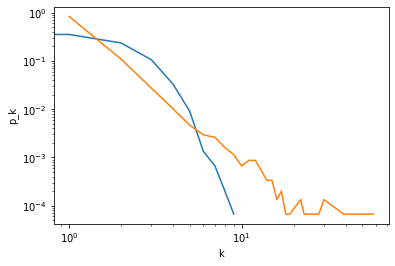

In [ ]:
plt.plot(degree_distr.index,degree_distr['p'])
plt.plot(degree_dist.index, degree_dist['p'])
#plt.scatter(degree_dist.index, degree_dist['p'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("p_k")
plt.show()

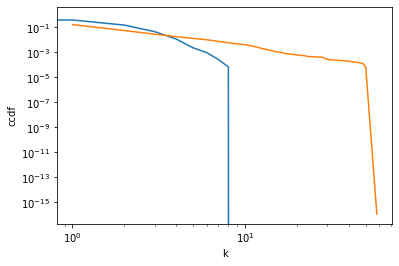

In [ ]:
plt.plot(degree_distr.index,degree_distr['ccdf'])
plt.plot(degree_dist.index, degree_dist['ccdf'])
#plt.scatter(degree_dist.index, degree_dist['p'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("ccdf")
plt.show()

In [ ]:
df_degree = pd.DataFrame(er_degrees)

In [ ]:
first = df_degree.iloc[:, 0]
#second = df_degree.iloc[:, 1]
print(first)

0        3
1        2
2        0
3        1
4        2
        ..
14993    0
14994    2
14995    0
14996    1
14997    0
Name: 0, Length: 14998, dtype: int64


In [ ]:
df_degreef = pd.DataFrame(twitch.degree(), columns=["node", "degree"])
degree_countf = df_degreef.groupby('degree')['degree'].count()
degree_distf = pd.DataFrame({'n':degree_countf})

degree_distf['p'] = degree_distf['n']/degree_distf['n'].sum()
degree_distf['cdf'] = np.cumsum(degree_distf['p'])
degree_distf['ccdf'] = 1-degree_distf['cdf']

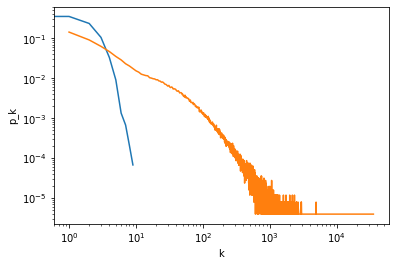

In [ ]:
plt.plot(degree_distr.index,degree_distr['p'])
plt.plot(degree_distf.index, degree_distf['p'])
#plt.scatter(degree_dist.index, degree_dist['p'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("p_k")
plt.show()

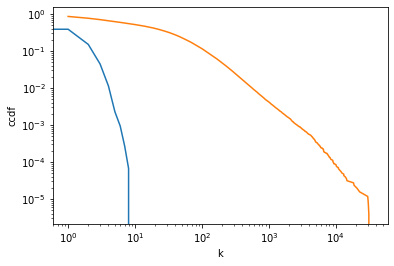

In [ ]:
plt.plot(degree_distr.index,degree_distr['ccdf'])
plt.plot(degree_distf.index, degree_distf['ccdf'])
#plt.scatter(degree_dist.index, degree_dist['p'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("ccdf")
plt.show()

In [ ]:
avg_path_length_random = log(nodes)/log(avg_deg)
print(avg_path_length_random)

3.13882341806846


In [ ]:
random_clustering_coef = avg_deg/nodes
print(random_clustering_coef)

0.0002059090659413751


In [ ]:
gamma= 2.527264

In [ ]:
ma = max(degree_countf)

In [ ]:
# this function gets us the probability that a node is of degree k in a scale-free distribution with parameter gamma
def power_law_p(k, gamma = 2.527264):
  C = 1/sp.zeta(x = gamma) # Riemann-zeta function from scipy.special
  p = C*(k**(-gamma))
  return(p)

In [ ]:
# array of possible degrees
k_vals = np.arange(start = 1, stop = 10000, step = 1)
# probability of each degree
p_vals = power_law_p(k = k_vals)
#print(k_vals)

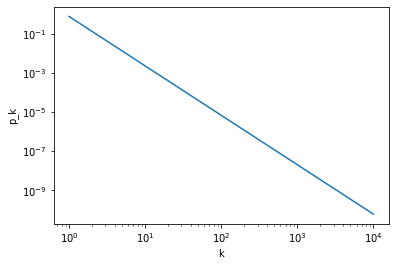

In [ ]:
# what would this distribution look like?
plt.plot(k_vals, p_vals)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("p_k")
plt.show()

In [ ]:
# function to generate scale-free network with N nodes and exponent gamma
#def generate_p_law(N, gamma):
  #k_vals = np.arange(start = 1, stop = 10000, step = 1) # evaluate the probabilities for every degree from 1 to 10,000
 # p_vals = power_law_p(k = k_vals, gamma = gamma) # find the probabilities
  #p_vals = p_vals.astype('float64')/sum(p_vals.astype('float64')) # we need to normalise the probabilities here to make sure they sum to 1, otherwise np.random.choice won't work
  #degrees = np.random.choice(k_vals, N, p=p_vals) # sample the degrees according to their probabilities given in p_vals
  #while (sum(degrees)%2 != 0): # for the configuration model, the sum of all degrees must be even, we ensure that happens here
 #   degrees = np.random.choice(k_vals, N, p=p_vals)
 # pl_net = nx.configuration_model(degrees) # generate network from degree sequence using configuration model
 # return(pl_net)

In [ ]:
d = df_degreefull['degree'].tolist()
pl_net = nx.configuration_model(d)

In [ ]:
df_degreefull

,node,degree
0,98343,39
1,141493,4456
2,58736,420
3,140703,242
4,151401,235
...,...,...
256948,131422,1
256949,102494,1
256950,157597,1
256951,128281,1


In [ ]:
#pl_net = generate_p_law(N = nodes, gamma = gamma) # generate network with N nodes and with parameter gamma
#nx.draw(pl_net) # we can plot for small numbers of nodes but for large numbers of nodes this takes too long

KeyboardInterrupt: ignored

In [ ]:
# get degrees so we can plot the distribution using the code from week 3
pl_degrees = [val for (node, val) in pl_net.degree()]
#print(pl_degrees)

In [ ]:
# Getting the degree distribution
degree_dfm = pd.DataFrame(pl_degrees, columns = ["degree"]) # create data frame with degree of each node as a column
degree_countm = degree_dfm.groupby('degree')['degree'].count() # get the number of nodes with each degree
degree_distm = pd.DataFrame({'n':degree_countm}) # convert to dataframe
degree_distm['p'] = degree_distm['n']/degree_distm['n'].sum() # add probability that a node chosen at random is that degree
degree_distm['cdf'] = np.cumsum(degree_distm['p'])
degree_distm['ccdf'] = 1-degree_distm['cdf']
#print(degree_dist)

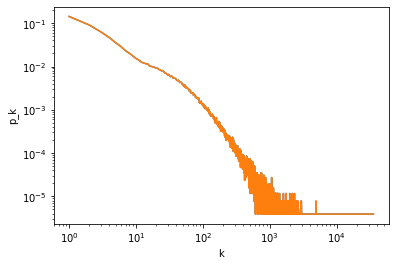

In [ ]:
plt.plot(degree_distm.index,degree_distm['p'])
plt.plot(degree_distf.index, degree_distf['p'])
#plt.scatter(degree_dist.index, degree_dist['p'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("p_k")
plt.show()

In [ ]:
def gen_er_net(N, av_degree):
  p = av_degree/(N-1)
  er_net = nx.erdos_renyi_graph(n= N, p = p)
  return(er_net)

In [ ]:
er_net = gen_er_net(N = nodes2, av_degree= avg_deg2)
#nx.draw(er_net, node_size=20, width = 2)
#plt.show()

In [ ]:
er_degrees = [val for (node, val) in er_net.degree()]
sum(er_degrees)/nodes 

0.0780220507252299

In [ ]:
degree_dfe = pd.DataFrame(er_degrees, columns = ["degree"]) # create data frame with degree of each node as a column
degree_counte = degree_dfe.groupby('degree')['degree'].count() # get the number of nodes with each degree
degree_diste = pd.DataFrame({'n':degree_counte}) # convert to dataframe
degree_diste['p'] = degree_diste['n']/degree_diste['n'].sum() # add probability that a node chosen at random is that degree
degree_diste['cdf'] = np.cumsum(degree_diste['p'])
degree_diste['ccdf'] = 1-degree_diste['cdf']
#print(degree_dist)

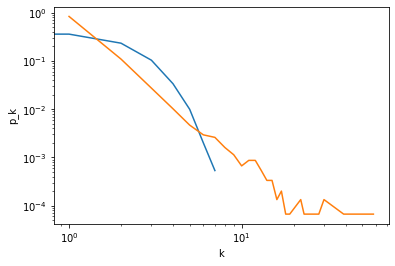

In [ ]:
plt.plot(degree_diste.index,degree_diste['p'])
plt.plot(degree_dist.index, degree_dist['p'])
#plt.scatter(degree_dist.index, degree_dist['p'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("p_k")
plt.show()

In [ ]:
self_loop_count = nx.number_of_selfloops(pl_net)
self_loop_count

651

In [ ]:
Apl = nx.adjacency_matrix(pl_net)
pledge_count = pl_net.number_of_edges()
pl_multi = Apl>1 # this leaves us with a sparse matrix with true in the place where there is a multi-link
multi_edge_count = pl_multi.sum()/2 # every edge appears twice in the matrix
percent_multi_edges = 100*multi_edge_count/pledge_count
print(str(percent_multi_edges)+ "% multi-links.")

1.9262876353960694% multi-links.


In [ ]:
ba_graph = nx.barabasi_albert_graph(n = nodes2, m = 1, seed=None, initial_graph=None)

In [ ]:
ba_graph3 = nx.barabasi_albert_graph(n = nodes3, m = 1, seed=None, initial_graph=None)

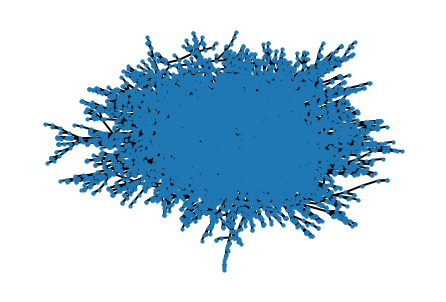

In [ ]:
nx.draw(ba_graph, node_size=10, width = 2)
plt.show()

In [ ]:
def deg_dist(net):
  degrees = [val for (node, val) in net.degree()]
  graph_deg = pd.DataFrame({'degree':degrees})
  deg_count = graph_deg.groupby('degree')['degree'].count()
  degree_dist = pd.DataFrame({'n':deg_count}) # convert to dataframe
  degree_dist['p'] = degree_dist['n']/degree_dist['n'].sum()
  return(degree_dist)

In [ ]:
ba_degrees = [val for (node, val) in ba_graph.degree()]

In [ ]:
degree_dfb = pd.DataFrame(ba_degrees, columns = ["degree"]) # create data frame with degree of each node as a column
degree_countb = degree_dfb.groupby('degree')['degree'].count() # get the number of nodes with each degree
degree_distb = pd.DataFrame({'n':degree_countb}) # convert to dataframe
degree_distb['p'] = degree_distb['n']/degree_distb['n'].sum() # add probability that a node chosen at random is that degree
degree_distb['cdf'] = np.cumsum(degree_distb['p'])
degree_distb['ccdf'] = 1-degree_distb['cdf']

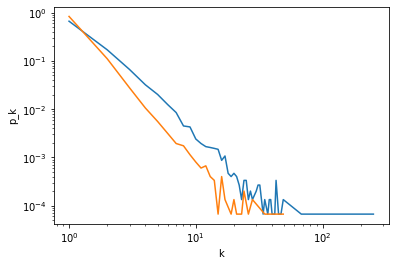

In [ ]:
plt.plot(degree_distb.index,degree_distb['p'])
plt.plot(degree_dist.index, degree_dist['p'])
#plt.scatter(degree_dist.index, degree_dist['p'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("p_k")
plt.show()

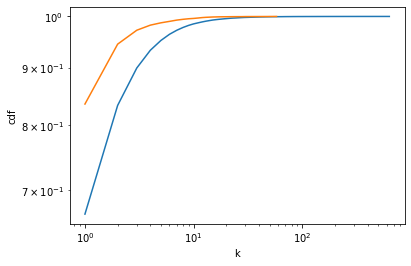

In [ ]:
plt.plot(degree_distb.index,degree_distb['cdf'])
plt.plot(degree_dist.index, degree_dist['cdf'])
#plt.scatter(degree_dist.index, degree_dist['p'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("cdf")
plt.show()

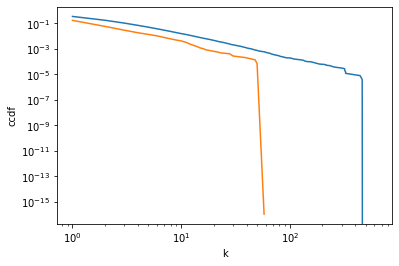

In [ ]:
plt.plot(degree_distb.index,degree_distb['ccdf'])
plt.plot(degree_dist.index, degree_dist['ccdf'])
#plt.scatter(degree_dist.index, degree_dist['p'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("ccdf")
plt.show()

In [ ]:
gn_communities = community.girvan_newman(twitch3) # iterator
gn_communities_1 = tuple(sorted(c) for c in next(gn_communities))
print(tuple(sorted(c) for c in next(gn_communities)))
print(tuple(sorted(c) for c in next(gn_communities)))

([62669, 108809], [73939, 91281, 144323], [104200, 147878], [119419, 138845], [96676, 145805], [207, 94290], [67680, 88340], ['108689', '44326'], [126152, 161933], [111283, 137700], [100860, 137526], [21736, 31927], [100112, 148828], ['134584', '157594', '22714', '37868', '52574', '55527', '70517', '71050'], ['59141'], [6589, 149016], [31140, 54134], [35186, 91617, 143680], [1852, 9086, 137749], [26508, 38531], [14041, 138465], [126861, 127594], [107070, 142991], [114819, 141517], [38915, 161069], [123325, 128009], [2478, 64889], [43871, 120813], [6504, 69780, 104627], [18714, 97889], [17819, 128818], [17866, 128864, 156849], [9646, 30152], ['17873'], [61265, 108945], [21854, 90663], [151810, 164325], [57916, 104775], [25436, 84706], [108721, 115301], [70980, 154765], [75932, 92931], [23027, 23773], [138436, 151172], [34536, 48047], [21213, 63839, 64133], [27098, 166206], [25949, 31515, 92345, 129719, 140987, 142282], [28551, 135745], [66576, 118653], [93946, 100124], [9698, 88248, 121

In [ ]:
gn_communitiesb = community.girvan_newman(ba_graph3) # iterator
gn_communities_1b = tuple(sorted(c) for c in next(gn_communitiesb))
print(tuple(sorted(c) for c in next(gn_communitiesb)))
print(tuple(sorted(c) for c in next(gn_communitiesb)))

([0, 1, 2, 8, 12, 27, 28, 31, 35, 38, 39, 44, 45, 50, 54, 57, 58, 59, 62, 66, 69, 79, 81, 85, 87, 88, 90, 91, 93, 97, 101, 103, 104, 105, 107, 109, 111, 113, 114, 115, 117, 123, 125, 129, 135, 136, 138, 142, 143, 145, 148, 150, 157, 160, 161, 162, 166, 169, 172, 176, 183, 184, 185, 191, 197, 198, 199, 200, 201, 202, 205, 212, 214, 217, 218, 222, 229, 232, 235, 236, 237, 239, 241, 242, 245, 247, 249, 251, 253, 254, 256, 260, 265, 270, 271, 274, 276, 277, 281, 285, 286, 288, 290, 292, 296, 307, 308, 309, 310, 314, 315, 316, 317, 321, 323, 325, 326, 332, 333, 336, 338, 341, 342, 344, 347, 348, 349, 357, 358, 361, 363, 364, 368, 370, 372, 375, 376, 379, 380, 381, 382, 383, 385, 386, 387, 388, 389, 391, 393, 399, 400, 402, 408, 409, 410, 418, 423, 432, 433, 435, 437, 439, 441, 442, 446, 447, 448, 450, 453, 454, 455, 457, 461, 462, 463, 468, 474, 477, 478, 479, 480, 481, 483, 485, 486, 487, 488, 489, 490, 494, 496, 497, 502, 505, 507, 510, 512, 514, 516, 520, 521, 522, 523, 525, 526, 528, 52

In [ ]:
nx_comm.modularity(ba_graph3, nx_comm.label_propagation_communities(ba_graph3))

0.7088976912630219

In [ ]:
nx_comm.modularity(twitch3, nx_comm.label_propagation_communities(twitch3))

0.9744801512287342

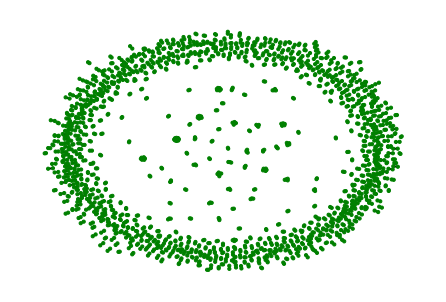

In [ ]:
gn_colour_map = ['red' if i in gn_communities_1b[0] else 'green' for i in range(twitch3.order())]
nx.draw(twitch3, node_color = gn_colour_map, with_labels=False, node_size=10, width = 2)

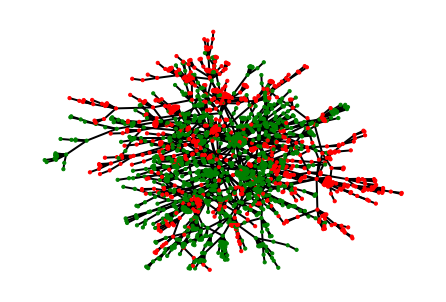

In [ ]:
gn_colour_mapb = ['red' if i in gn_communities_1b[0] else 'green' for i in range(ba_graph3.order())]
nx.draw(ba_graph3, node_color = gn_colour_mapb, with_labels=False, node_size=10, width = 2)

In [ ]:
print(nodes3)

1891


In [ ]:
# function to get the size of the largest connected component

def largest_cc_size(G):
  largest_cc = max(nx.connected_components(G), key=len)
  f_G = len(largest_cc)
  return(f_G)

In [ ]:
P_0 = largest_cc_size(pl_net)

In [ ]:
P_0 = largest_cc_size(twitch)

In [ ]:
def perc(net):
  f = [0]
  P_f_ratio = [1]
  N = net.order()
  i=0
  while f[i] < 1:
    i += 1
    net_nodes = net.nodes()
    nodes_to_remove = sample(net_nodes, 500)
    f_new = 500*i/N
    if f_new >= 1:
      break
    f.append(f_new)
    for j in nodes_to_remove:
      
      net.remove_node(j)
    P_f_ratio.append(largest_cc_size(net)/P_0)

  return f, P_f_ratio

In [ ]:
  f, P_f_ratio = perc(twitch)
  plt.scatter(f, P_f_ratio, label = i)
plt.xlabel("$f$")
plt.ylabel("$p_{\\infty}(f)/p_{\\infty}(0)$")
plt.show()

ValueError: ignored

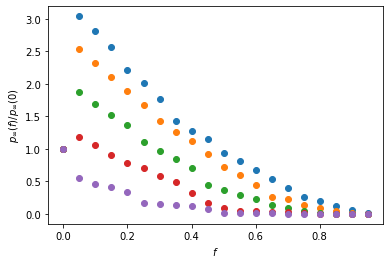

In [ ]:
plt.scatter(f, P_f_ratio)
plt.xlabel("$f$")
plt.ylabel("$p_{\\infty}(f)/p_{\\infty}(0)$")
plt.show()